<a href="https://colab.research.google.com/github/saintroger/StatModeling_MSDS22/blob/main/SaintRoger_BountsebeEbouemeLab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.formula.api import ols
!pip install matplotlib==3.5

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Question 0: Recreate the following set-up which we did in class.


> (a) Create the variable is male which is 0 when the penguin is female and 1 when the penguin is male.





In [2]:
df_penguins = sns.load_dataset('penguins')
df_penguins.dropna(inplace=True)
colors = {'Male':'blue', 'Female':'red', 'nan':'white'}
df_penguins['is_male'] = df_penguins['sex'].apply(lambda x : int(x == 'Male'))
df_penguins['is_female'] = df_penguins['sex'].apply(lambda x : int(x == 'Female'))
print(df_penguins)

    species     island  bill_length_mm  ...     sex  is_male  is_female
0    Adelie  Torgersen            39.1  ...    Male        1          0
1    Adelie  Torgersen            39.5  ...  Female        0          1
2    Adelie  Torgersen            40.3  ...  Female        0          1
4    Adelie  Torgersen            36.7  ...  Female        0          1
5    Adelie  Torgersen            39.3  ...    Male        1          0
..      ...        ...             ...  ...     ...      ...        ...
338  Gentoo     Biscoe            47.2  ...  Female        0          1
340  Gentoo     Biscoe            46.8  ...  Female        0          1
341  Gentoo     Biscoe            50.4  ...    Male        1          0
342  Gentoo     Biscoe            45.2  ...  Female        0          1
343  Gentoo     Biscoe            49.9  ...    Male        1          0

[333 rows x 9 columns]




> b) Find the line of best fit to predict body mass from flipper length and whether the penguin is male or female.



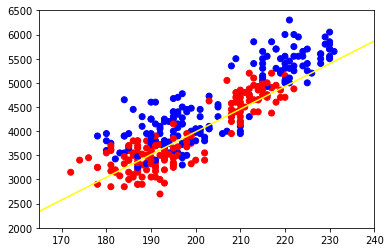

In [3]:
plt.scatter(df_penguins['flipper_length_mm'], df_penguins['body_mass_g'], c=df_penguins['sex'].map(colors))
model = ols(formula = 'body_mass_g ~ flipper_length_mm + is_male', data=df_penguins)
res = model.fit()
b, m, a = res.params
plt.axline((0, b), slope=m, color='yellow')#understand this axline function

#adjusting the plot 
plt.xlim([165, 240])
plt.ylim([2000, 6500])
plt.show()


Question 1:

> Create a scatter plot with flipper length on the x-axis and body mass on the y-axis. Color the points according to the penguin’s sex.



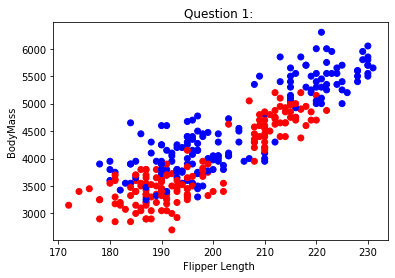

In [4]:
df_penguins = sns.load_dataset('penguins')
df_penguins.dropna(inplace=True)
df_penguins['is_male'] = df_penguins['sex'].apply(lambda x : int(x == 'Male'))
plt.scatter(df_penguins['flipper_length_mm'], df_penguins['body_mass_g'], c=df_penguins['sex'].map(colors))
plt.xlabel('Flipper Length ')
plt.ylabel('BodyMass')
plt.title('Question 1: ')
plt.show()

Question 2: 

> Find the line of best fit for the penguins dataset to predict body mass from flipper length. Plot this on the plot from Q1.



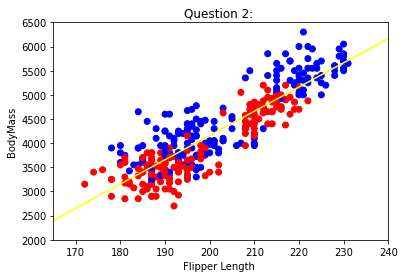

In [5]:

model = ols(formula = 'body_mass_g ~ flipper_length_mm', data=df_penguins)
res = model.fit()
b, m = res.params

plt.axline((0, b), slope=m, color='yellow')
plt.scatter(df_penguins['flipper_length_mm'], df_penguins['body_mass_g'], c=df_penguins['sex'].map(colors))
plt.xlim([165, 240])
plt.ylim([2000, 6500])
plt.xlabel('Flipper Length ')
plt.ylabel('BodyMass')
plt.title('Question 2: ')
plt.show()

Question 3: 

> Find two lines of best fit: one for the male and one for the female penguins. Plot this on the plot from Q1



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


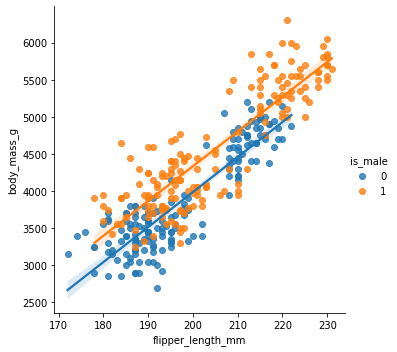

In [6]:
sns.lmplot('flipper_length_mm', 'body_mass_g', hue='is_male', data = df_penguins)


Question 4:
> Take the line of best fit from above which used both flipper length and is male. Plot this line with Xis male = 0 and with Xis male = 1. What do you notice?



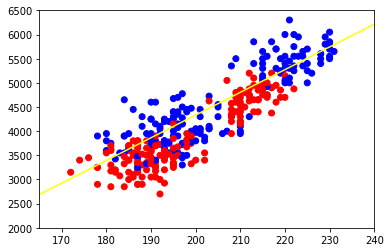

In [10]:
plt.scatter(df_penguins['flipper_length_mm'], df_penguins['body_mass_g'], c=df_penguins['sex'].map(colors))
df_penguins['is_female'] = df_penguins['sex'].apply(lambda x : int(x == 'Female'))

model = ols(formula = 'body_mass_g ~ flipper_length_mm + is_female', data=df_penguins)
res = model.fit()
b, m, a = res.params
plt.axline((0, b), slope=m, color='yellow')#understand this axline function

#adjusting the plot 
plt.xlim([165, 240])
plt.ylim([2000, 6500])
plt.show()


I noticed that the line of best fit here is a bit higher(Up and to the right).It seems to be plotting the line of best for female. 